<a href="https://colab.research.google.com/github/chaeeerish/bootcamp_team/blob/main/%EC%9D%B4%EC%88%98%EB%AF%BC/classification_efficientNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.데이터 로드, 정제, 확인

In [ ]:
#google drive 연결
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
#import lib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

import imageio #이미지 불러오기
# import skimage # Numpy배열로 이미지 객체를 다룬다.
# import skimage.io
# import skimage.transform

from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/htp_project/dataset/tree_type.csv', encoding='CP949')
df

,img_name,type
0,전체1.png,0
1,전체2.png,0
2,전체3.png,0
3,전체4.png,0
4,전체5.png,0
...,...,...
898,전체900.jpg,0
899,전체901.jpg,0
900,전체902.jpg,0
901,전체903.jpg,0


In [ ]:
#type 확인: 0(상록수), 1(버드나무), 2(고목), 3(그루터기)
df['type'].unique()

array([0, 2, 4, 3, 1])

In [ ]:
#type별 데이터 수 확인
df['type'].value_counts()

0    426
1    150
2    139
3    120
4     68
Name: type, dtype: int64

In [ ]:
df_0 = df[df['type']==0]

In [ ]:
#type 0 데이터 150개 추출
df_0 = df_0.sample(n=150)
df_0

,img_name,type
142,전체143.png,0
108,전체109.png,0
175,전체176.png,0
432,전체434.png,0
347,전체349.png,0
...,...,...
452,전체454.png,0
578,전체580.png,0
389,전체391.png,0
144,전체145.png,0


In [ ]:
df_remove_0 = df[df['type']!=0]
df_remove_0

,img_name,type
8,전체9.png,2
11,전체12.png,4
12,전체13.png,4
15,전체16.png,4
17,전체18.png,3
...,...,...
886,전체888.jpg,4
887,전체889.jpg,4
888,전체890.jpg,4
889,전체891.jpg,4


In [ ]:
df_remove_0['type'].unique()

array([2, 4, 3, 1])

In [ ]:
df_origin = df

In [ ]:
#균형 맞춘 데이터 생성
df = pd.concat([df_0, df_remove_0])
df

,img_name,type
142,전체143.png,0
108,전체109.png,0
175,전체176.png,0
432,전체434.png,0
347,전체349.png,0
...,...,...
886,전체888.jpg,4
887,전체889.jpg,4
888,전체890.jpg,4
889,전체891.jpg,4


In [ ]:
df['type'].value_counts()

0    150
1    150
2    139
3    120
4     68
Name: type, dtype: int64

In [ ]:
IMAGE_PATH = '/content/drive/MyDrive/htp_project/dataset/tree_img/'

In [ ]:
image_files = list(os.listdir(IMAGE_PATH))
print(image_files)

['전체7.png', '전체4.png', '전체6.png', '전체2.png', '전체3.png', '전체5.png', '전체1.png', '전체8.png', '전체11.png', '전체9.png', '전체10.png', '전체20.png', '전체26.png', '전체31.png', '전체30.png', '전체14.png', '전체25.png', '전체29.png', '전체28.png', '전체15.png', '전체24.png', '전체21.png', '전체22.png', '전체32.png', '전체23.png', '전체16.png', '전체19.png', '전체17.png', '전체27.png', '전체18.png', '전체13.png', '전체12.png', '전체34.png', '전체39.png', '전체37.png', '전체45.png', '전체33.png', '전체44.png', '전체35.png', '전체42.png', '전체36.png', '전체40.png', '전체38.png', '전체43.png', '전체46.png', '전체41.png', '전체55.png', '전체48.png', '전체47.png', '전체52.png', '전체49.png', '전체50.png', '전체53.png', '전체51.png', '전체54.png', '전체60.png', '전체63.png', '전체57.png', '전체62.png', '전체59.png', '전체61.png', '전체58.png', '전체64.png', '전체56.png', '전체65.png', '전체68.png', '전체74.png', '저

In [ ]:
file_names = list(df['img_name'])
print(file_names)

['전체143.png', '전체109.png', '전체176.png', '전체434.png', '전체349.png', '전체17.png', '전체331.png', '전체551.png', '전체286.png', '전체895.jpg', '전체162.png', '전체177.png', '전체84.png', '전체384.png', '전체14.png', '전체410.png', '전체436.png', '전체443.png', '전체41.png', '전체21.png', '전체518.png', '전체498.png', '전체52.png', '전체536.png', '전체24.png', '전체360.png', '전체345.png', '전체48.png', '전체88.png', '전체448.png', '전체526.png', '전체366.png', '전체507.png', '전체870.png', '전체43.png', '전체1.png', '전체56.png', '전체553.png', '전체432.png', '전체157.png', '전체92.png', '전체584.png', '전체897.jpg', '전체249.png', '전체191.png', '전체578.png', '전체329.png', '전체224.png', '전체173.png', '전체158.png', '전체129.png', '전체522.png', '전체148.png', '전체302.png', '전체77.png', '전체439.png', '전체592.png', '전체369.png', '전체146.png', '전체267.png', '전체576.png', '전체514.png', '전체134.png', '전체292.png', '전체27.png', '전체451.png', '전체322.png', '전체37.png', '전체210.png', '전체187.png', '전체98.png', '전체442.png', '전체217.png', '전체220.png', '전체416.png', '전체30.png', '전체365.png', '전체46.png', '전체28

In [ ]:
#이미지 그리는 함수
def draw_category_images(var,cols=5):
    categories = (df.groupby([var])[var].nunique()).index
    f, ax = plt.subplots(nrows=len(categories),ncols=cols, figsize=(2*cols,2*len(categories)))
    # draw a number of images for each location
    for i, cat in enumerate(categories):
        sample = df[df[var]==cat].sample(cols)
        for j in range(0,cols):
            file=IMAGE_PATH + sample.iloc[j]['img_name']
            im=imageio.imread(file)
            ax[i, j].imshow(im, resample=True)
            ax[i, j].set_title(cat, fontsize=9)  
    plt.tight_layout()
    plt.show()

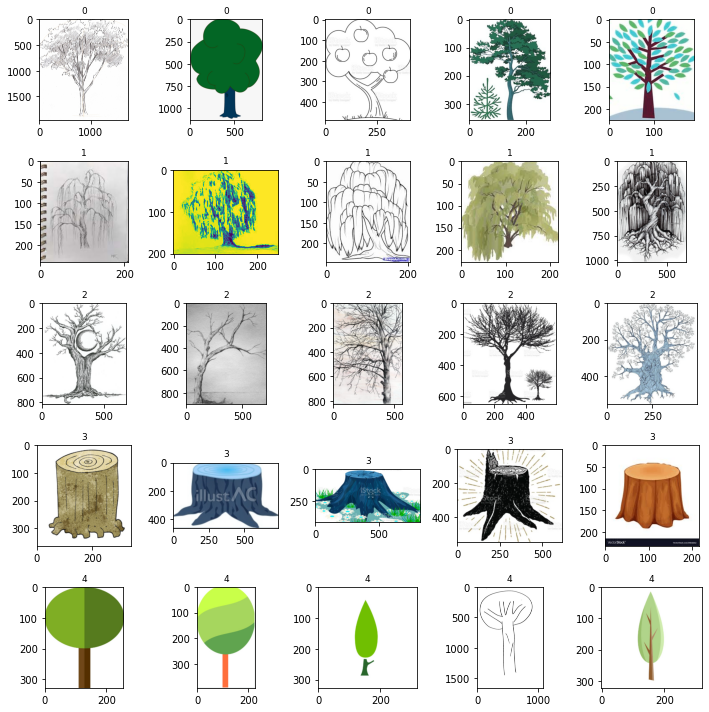

In [ ]:
draw_category_images('type')

# 2.학습/테스트 데이터 분리

In [ ]:
#train set:test set = 0.8:0.2
train_df, test_df = train_test_split(df, test_size=0.2, random_state=1, stratify=df['type'])

In [ ]:
#확인
print("Train set rows: {}".format(train_df.shape[0]))
print("Test  set rows: {}".format(test_df.shape[0]))

Train set rows: 501
Test  set rows: 126


In [ ]:
def read_image(file_name):
  # print(file_name)
  image = cv2.imread(IMAGE_PATH + file_name)
  image = cv2.resize(image, dsize=(300, 300))
  # print(image.shape)
  return image[:,:,:3]

In [ ]:
def categories_encoder(dataset):
    #file명을 읽어 이미지 경로에서 불러온다. X 값.
    X = np.stack(dataset['img_name'].apply(read_image))
    # subspecies를 더미변수화 하여 y값으로
    y = pd.get_dummies(dataset['type'], drop_first=False)
    return X, y

In [ ]:
#file명을 읽어 이미지 경로에서 불러온다. X 값.
X_train, y_train = categories_encoder(train_df)
X_test, y_test = categories_encoder(test_df)

In [ ]:
#개수, size, channel
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(501, 300, 300, 3)
(501, 5)
(126, 300, 300, 3)
(126, 5)


In [ ]:
#하이퍼 파라미터 생성
BATCH_SIZE = 32 # 한 번에 처리할 데이터량 설정
EPOCHS = 20 # 신경망을 학습할 횟수
VERBOSE = 1 # 학습 진행 상황 출력 모드 설정 

# 3.efficientnet
[Link](https://github.com/qubvel/efficientnet)

In [1]:
!pip install -U efficientnet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.7/50.7 KB 2.7 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from skimage.io import imread
import matplotlib.pyplot as plt
import efficientnet.keras as efn 
import keras 
from keras.models import Model

from keras.applications.imagenet_utils import decode_predictions

from efficientnet.keras import EfficientNetB0, EfficientNetB3
from efficientnet.keras import center_crop_and_resize, preprocess_input

## if you use tensorflow.keras: 
# from efficientnet.tfkeras import EfficientNetB0
# from efficientnet.tfkeras import center_crop_and_resize, preprocess_input

import os

# 4.Download EfficientNet

In [ ]:
base_model = efn.EfficientNetB3(weights='imagenet') #imagenet 가중치 사용

50086816/50086816 [==============================] - 3s 0us/step


# 5.output layer 변경 및 모델 확인

In [ ]:
#output layer 변경
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
net = Dense(5, activation='softmax')(base_model.layers[-2].output)

In [ ]:
model = Model(inputs=base_model.input, outputs=net)

In [ ]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 300, 300, 3  0           []                               
                                )]                                                                
                                                                                                  
 stem_conv (Conv2D)             (None, 150, 150, 40  1080        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 stem_bn (BatchNormalization)   (None, 150, 150, 40  160         ['stem_conv[0][0]']              
                                )                                                             

# 6.모델 학습 및 결과 확인

In [ ]:
from keras.callbacks import EarlyStopping 
early_stopping = EarlyStopping(patience=3)

history = model.fit(
    X_train, y_train,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=VERBOSE,
    validation_split=0.2,
    callbacks=[early_stopping]
)

Epoch 1/20
13/13 [==============================] - 81s 1s/step - loss: 0.7291 - accuracy: 0.7450 - val_loss: 1823.9817 - val_accuracy: 0.2178
Epoch 2/20
13/13 [==============================] - 12s 888ms/step - loss: 0.1355 - accuracy: 0.9475 - val_loss: 3305.5034 - val_accuracy: 0.2376
Epoch 3/20
13/13 [==============================] - 12s 893ms/step - loss: 0.1273 - accuracy: 0.9600 - val_loss: 259.3150 - val_accuracy: 0.2178
Epoch 4/20
13/13 [==============================] - 12s 901ms/step - loss: 0.1823 - accuracy: 0.9400 - val_loss: 253.8164 - val_accuracy: 0.2277
Epoch 5/20
13/13 [==============================] - 12s 902ms/step - loss: 0.1360 - accuracy: 0.9600 - val_loss: 370.7720 - val_accuracy: 0.3069
Epoch 6/20
13/13 [==============================] - 12s 910ms/step - loss: 0.1429 - accuracy: 0.9600 - val_loss: 83.7972 - val_accuracy: 0.3960
Epoch 7/20
13/13 [==============================] - 12s 914ms/step - loss: 0.0720 - accuracy: 0.9775 - val_loss: 5.7832 - val_accura

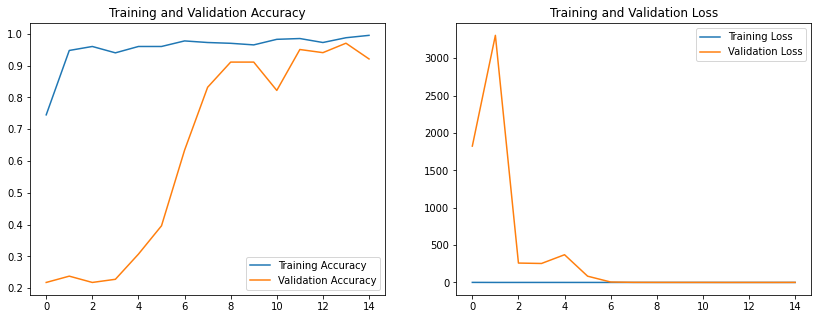

In [ ]:
#결과 확인
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [ ]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 2s 631ms/step - loss: 0.8491 - accuracy: 0.9048


[0.8491493463516235, 0.9047619104385376]

In [ ]:
#이미지 예측
predictions = model.predict(X_test)

4/4 [==============================] - 3s 187ms/step


In [ ]:
np.argmax(predictions[2])

3

In [ ]:
#3번째 값이 1인 것 확인
y_test

,0,1,2,3,4
443,1,0,0,0,0
244,1,0,0,0,0
339,0,0,0,1,0
73,0,0,1,0,0
847,0,0,0,0,1
...,...,...,...,...,...
844,0,0,0,0,1
271,0,0,1,0,0
842,0,0,0,0,1
886,0,0,0,0,1


# 7.테스트

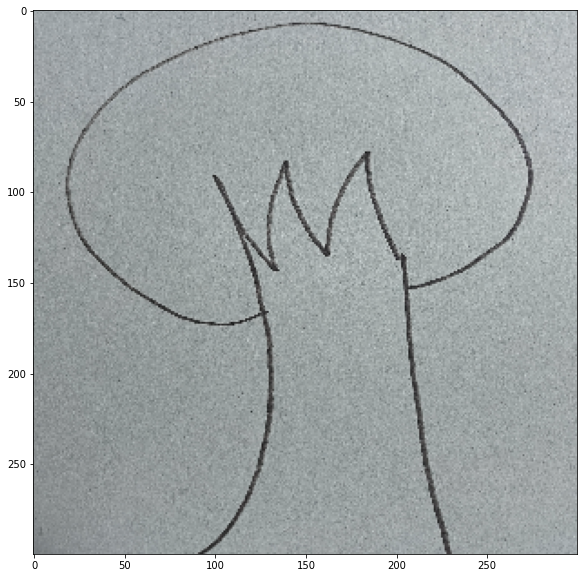

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/htp_project/dataset/IMG_7284.JPG')
test_image = cv2.resize(test_image, dsize=(300, 300))

plt.figure(figsize=(10,10))
plt.imshow(test_image)
plt.show()

In [ ]:
image = cv2.imread('/content/drive/MyDrive/htp_project/dataset/IMG_7284.JPG')
image = cv2.resize(image, dsize=(300, 300))
test_image = np.array(image)

In [ ]:
final_test_image = np.expand_dims(test_image, axis=0)

In [ ]:
final_test_image.shape

(1, 300, 300, 3)

In [ ]:
prediction = model.predict(final_test_image)

1/1 [==============================] - 1s 743ms/step


In [ ]:
#예측 클래스 확인: 1(버드나무)
np.argmax(prediction)

4

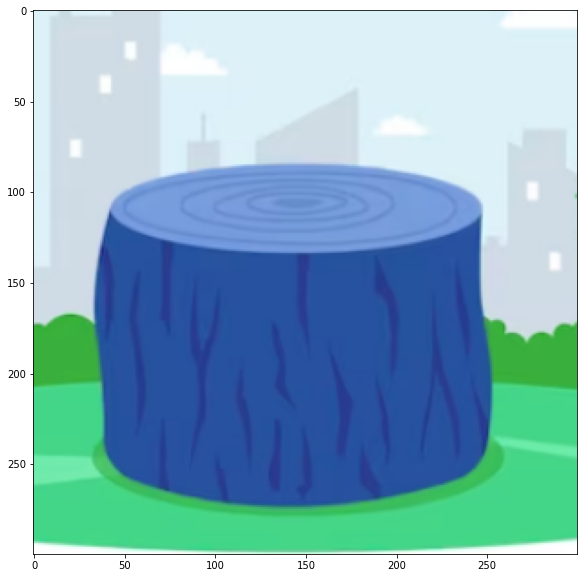

In [ ]:
test_image = cv2.imread('/content/drive/MyDrive/htp_project/dataset/test_2.PNG')
test_image = cv2.resize(test_image, dsize=(300, 300))

plt.figure(figsize=(10,10))
plt.imshow(test_image)
plt.show()

In [ ]:
image = cv2.imread('/content/drive/MyDrive/htp_project/dataset/test_2.PNG')
image = cv2.resize(image, dsize=(300, 300))
test_image = np.array(image)

In [ ]:
final_test_image = np.expand_dims(test_image, axis=0)

In [ ]:
final_test_image.shape

(1, 300, 300, 3)

In [ ]:
prediction = model.predict(final_test_image)

1/1 [==============================] - 0s 34ms/step


In [ ]:
#예측 클래스 확인: 3(그루터기)
np.argmax(prediction)

3

In [ ]:
model.save('/content/drive/MyDrive/htp_project/save_model')

In [ ]:
model.save('/content/drive/MyDrive/htp_project/tree_type.h5')